In [38]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [39]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=13)

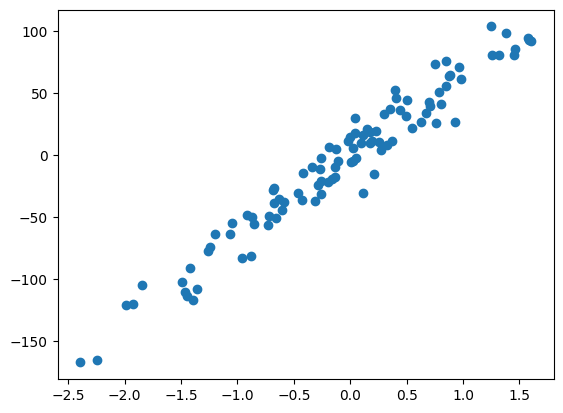

In [40]:
plt.scatter(X,y)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[64.85336502]
-2.958239101332649


In [44]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9518795684105927


In [45]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m=30
        self.b=0
        self.lr=learning_rate
        self.epochs=epochs
    
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.m,self.b)


    def predict(self,X):
        return self.m*X.ravel()+self.b
        
             


In [46]:
gd=GDRegressor(0.001,100)

In [47]:
gd.fit(X_train,y_train)

64.85280363848312 -2.9584693731793794


In [48]:
gd.predict(X)

array([-1.96679222e+01,  9.63459533e+00,  4.94408249e+01,  8.71361765e+00,
        1.01123165e+02,  5.74335247e+01,  3.28311570e+01, -9.68301942e+01,
       -2.47121852e+01, -4.43716066e+00,  8.27590862e+01, -4.74342573e+01,
        1.49798690e+01,  6.58535664e-01, -3.02360694e+01,  7.77362363e+01,
       -9.94968455e+01,  1.81205947e+01,  4.67647130e+00, -1.27663817e+02,
        4.81694341e+01, -9.47953267e+01,  7.87668275e+01, -4.09526664e+01,
       -1.02281406e+01, -4.19913780e+01, -1.34413031e+01, -9.31332391e+01,
       -2.50813975e+00,  2.12339339e+01,  5.20303879e+01, -2.05412598e+01,
        5.42989434e+01,  2.31115412e+01, -5.97726921e+01,  2.00537968e+01,
       -2.34561195e+01,  3.76261351e+01,  9.12381525e+01, -7.06733454e+01,
       -1.96705696e+01,  9.92437773e+01, -1.48686842e+02, -4.97680115e+01,
        2.97293648e+01, -4.67350487e+01, -4.39404725e+01,  2.27901621e+01,
       -1.20296274e+00,  4.65864542e+01,  6.05296207e+01, -8.06532842e+01,
       -9.09048350e+01, -

In [49]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9518785686132031
